In [44]:
# %matplotlib widget
# %matplotlib notebook
from itertools import product, combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
from scipy.signal import correlate, correlation_lags
from scipy.signal import find_peaks, peak_prominences
from lmfit import Model, minimize

from pysmog.data_loading import load_defra_file
from pysmog.data_processing import bin_data
from pysmog.plot_utils import set_matplotlib_defaults
from pysmog.psd import lorentzian, log_lorentzian

In [45]:
set_matplotlib_defaults()

In [46]:
data_tower_hamlets = '../data/2022-01-01-230802122803.csv'
data_tower_soton = '../data/2022-01-01-230802132242.csv'

df  = load_defra_file(data_tower_hamlets)
df2 = load_defra_file(data_tower_soton)

In [47]:
df_numeric = df2.select_dtypes(include='number')
#df_numeric = df_numeric.fillna(0)
#df_numeric = df_numeric.dropna()
df_numeric = df_numeric.interpolate()

# Cross-Correlation.
The cross-correlation is a measure of similarity between two time series.

Cross-correlation for continuous functions $f$ and $g$ is
defined as:


$$
\left ( f\star g \right )\left ( \tau \right )
\triangleq \int_{t_0}^{t_0 +T}
\overline{f\left ( t \right )}g\left ( t+\tau \right )dt
$$
Where $\tau$ is defined as the displacement, also known as the lag. 


Cross correlation for discrete functions $f$ and $g$ is
defined as:

$$
        \left ( f\star g \right )\left [ n \right ]
        \triangleq \sum_{-\infty}^{\infty}
        \overline{f\left [ m \right ]}g\left [ m+n \right ]
$$
Where $n$ is the lag.

Calculating the cross-correlation for a light curve with itself is known as an auto-correlation function and gives a measure
of the effictive coherence timescales in the data.

In python an implementation of the cross-correlation function is implemented in `scipy.signal.correlate`
while the lag indices may be calculated using `scipy.signal.correlation_lags`

In [48]:
df_numeric = df_numeric.drop('t', axis=1)
xdata = df_numeric['NO'].values
ydata = df_numeric['NO2'].values

res = correlate(xdata, ydata, mode='full', method='auto')
lags = correlation_lags(len(xdata), len(ydata))

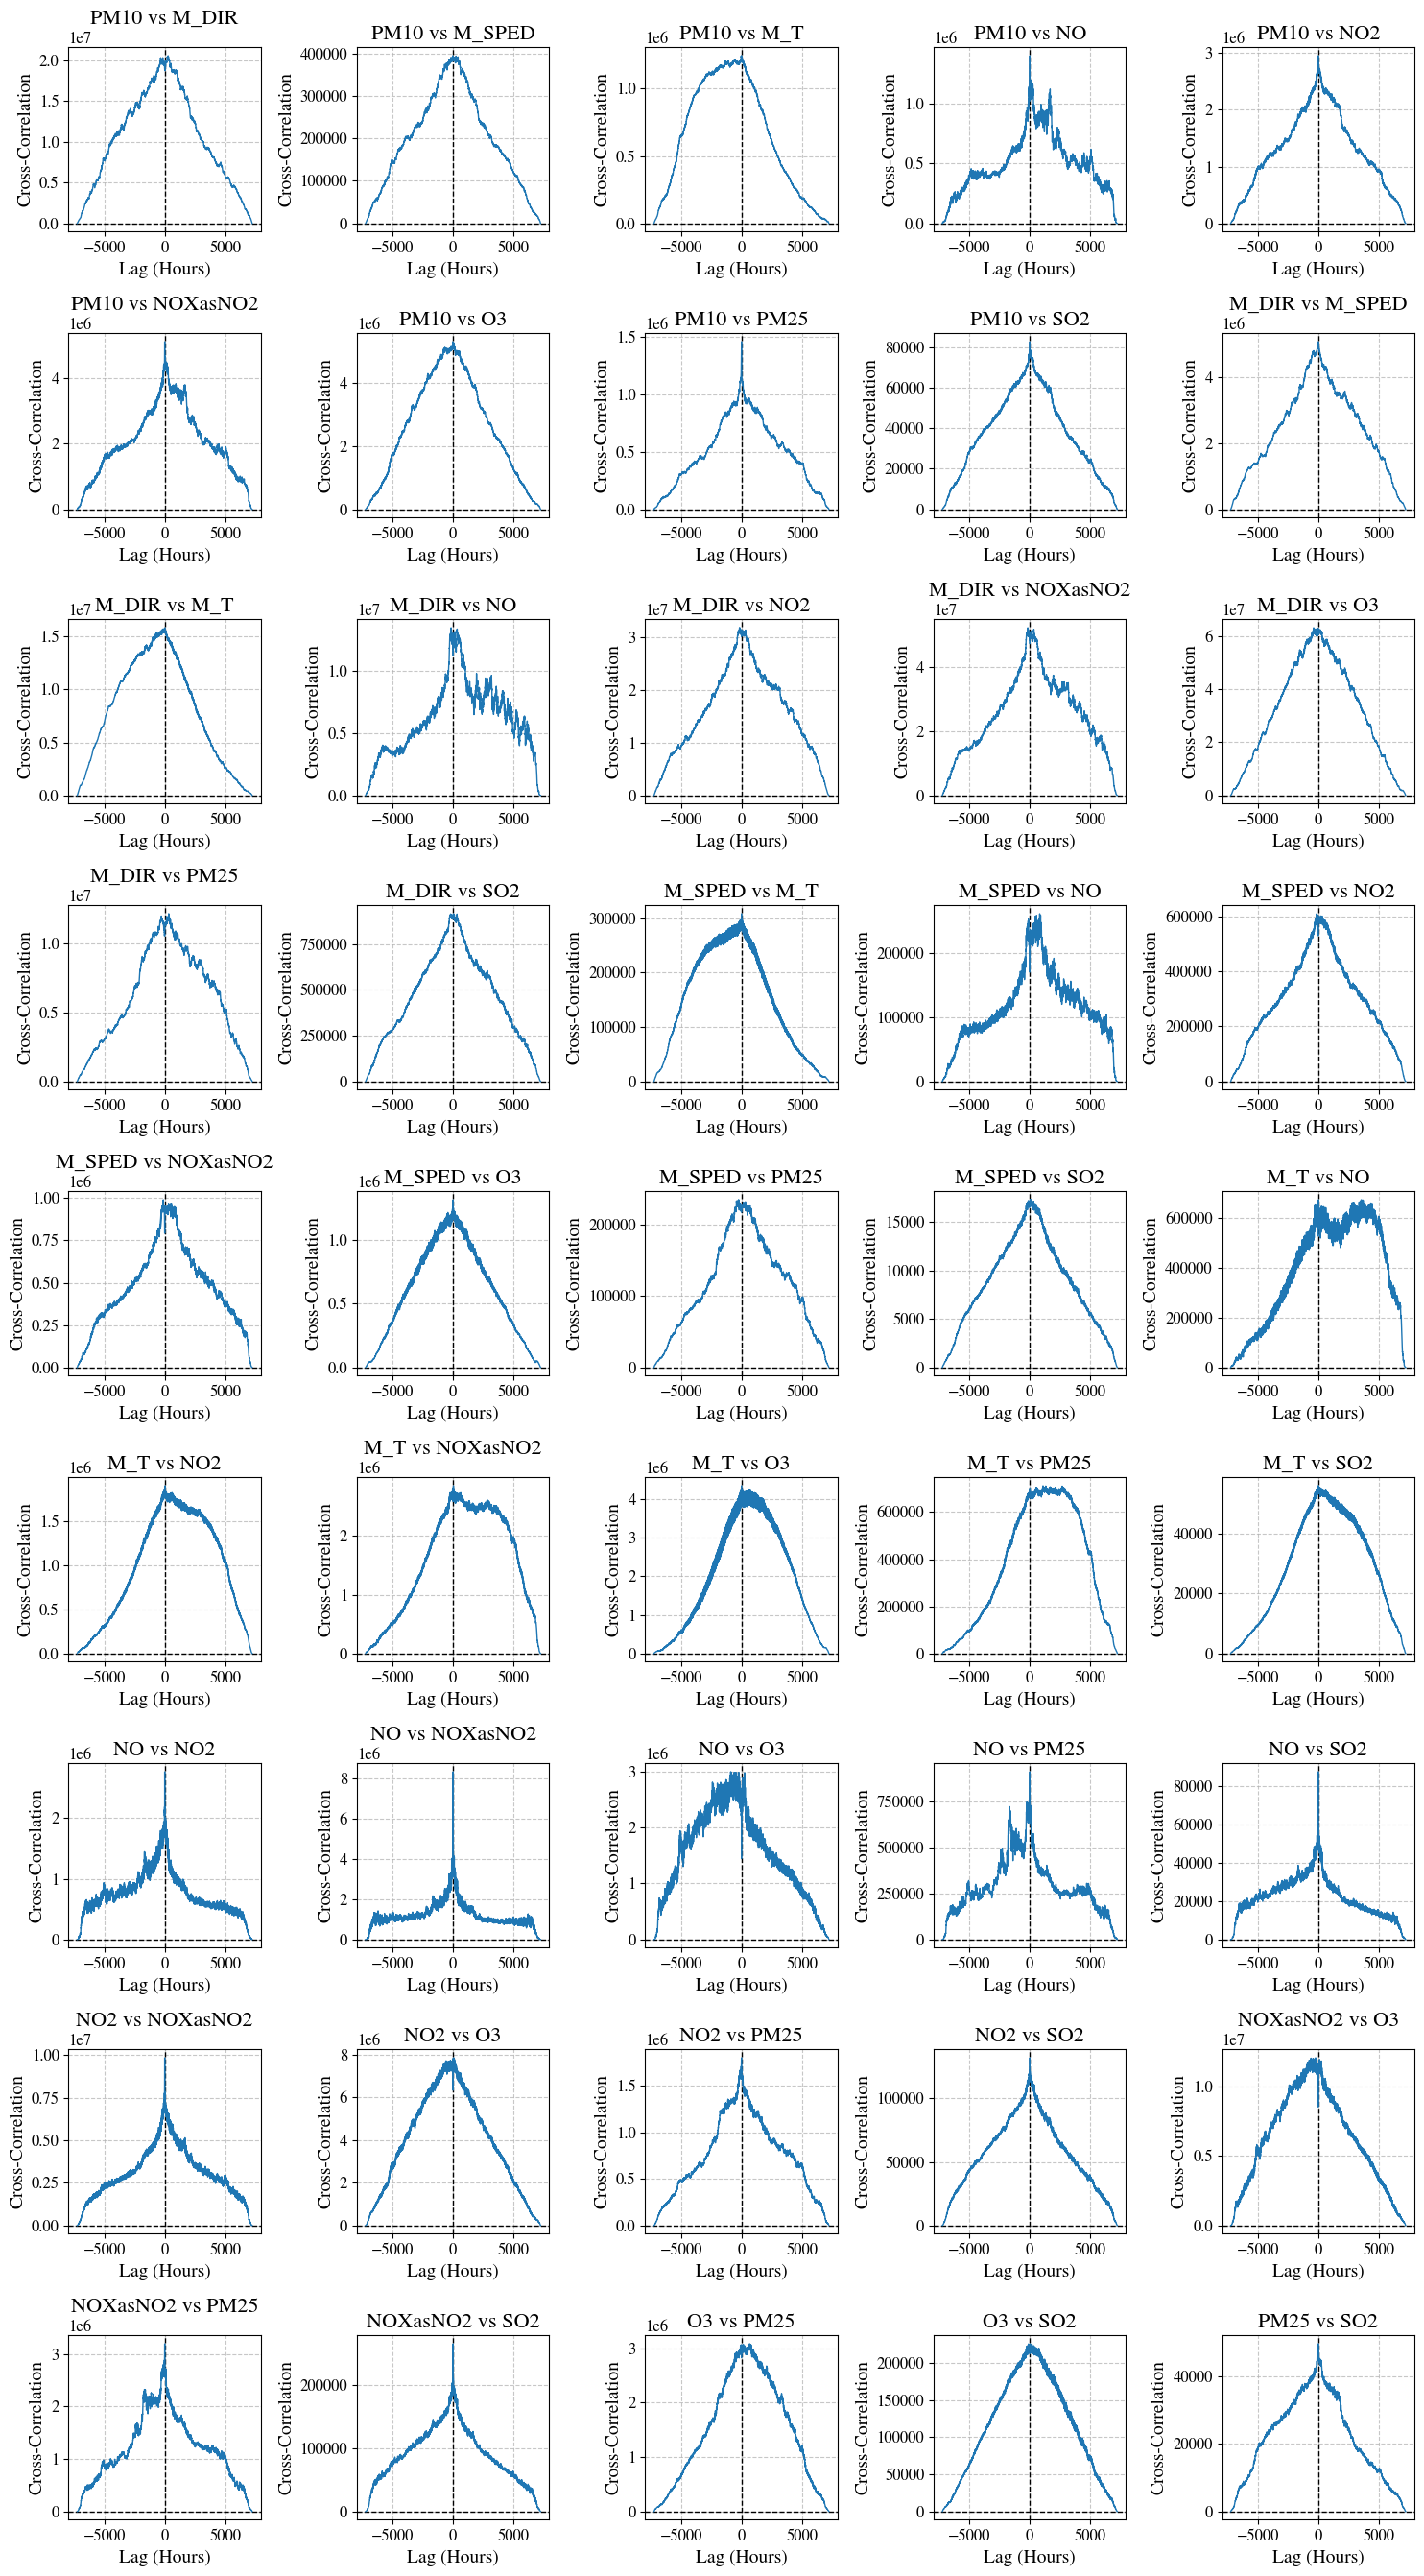

In [49]:
nrows = 9
ncols = 5
fig_width = 15
fig_height = fig_width * (nrows/ncols)
fig, ax = plt.subplots(nrows,ncols, figsize=(fig_width, fig_height))

i = 0
for col1, col2 in combinations(df_numeric.columns, r=2):
    xdata = df_numeric[col1].values
    ydata = df_numeric[col2].values

    res = correlate(xdata, ydata, mode='full', method='auto')
    lags = correlation_lags(len(xdata), len(ydata))
    
    
    #plt.figure(figsize=(6,6))
    axes = ax.flatten()[i]
    
    axes.set_title(f'{col1} vs {col2}')
    axes.axvline(0, color='black', ls='--')
    axes.axhline(0, color='black', ls='--')
    axes.plot(lags,res)

    axes.set_xlabel('Lag (Hours)')
    axes.set_ylabel('Cross-Correlation')
        
    i+=1
plt.tight_layout()

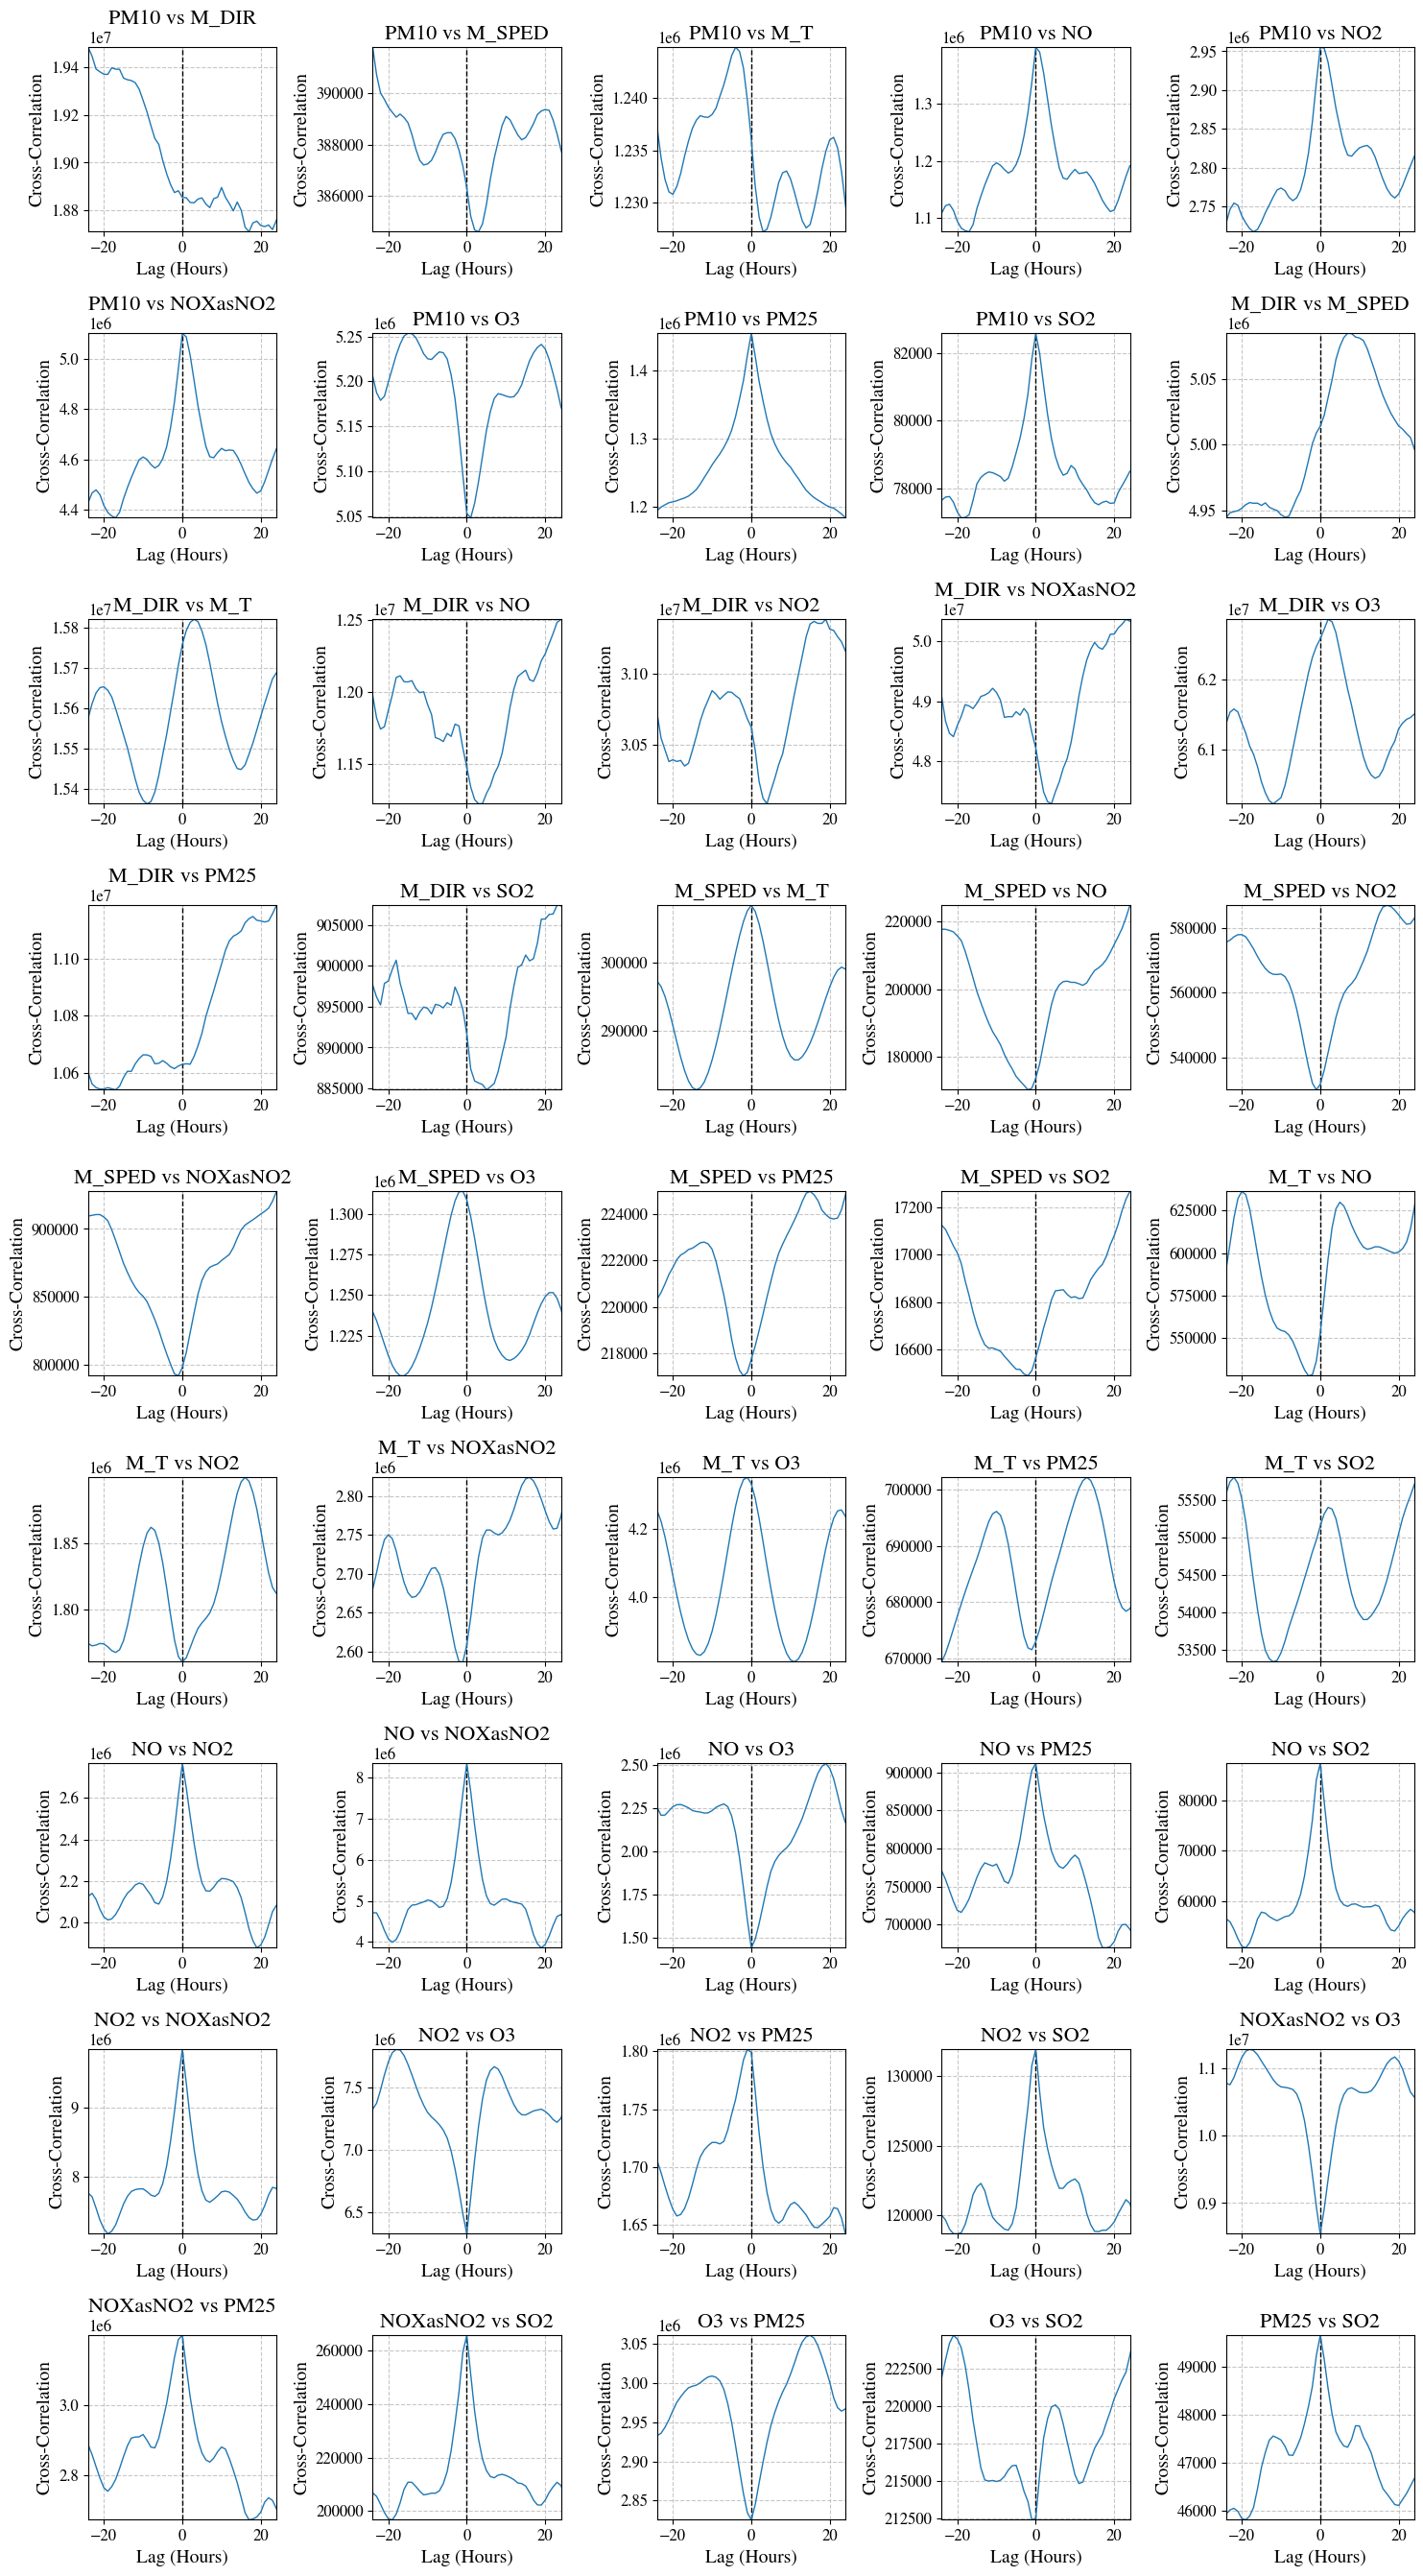

In [50]:
nrows = 9
ncols = 5
fig_width = 15
fig_height = fig_width * (nrows/ncols)
fig, ax = plt.subplots(nrows,ncols, figsize=(fig_width, fig_height))

i = 0
for col1, col2 in combinations(df_numeric.columns, r=2):
    xdata = df_numeric[col1].values
    ydata = df_numeric[col2].values

    res = correlate(xdata, ydata, mode='full', method='auto')
    lags = correlation_lags(len(xdata), len(ydata))
    
    
    #plt.figure(figsize=(6,6))
    axes = ax.flatten()[i]
    
    axes.set_title(f'{col1} vs {col2}')
    axes.axvline(0, color='black', ls='--')
    axes.axhline(0, color='black', ls='--')
    axes.plot(lags,res)
    
    x_min, x_max = -24, 24
    x_indices = (lags >= x_min) & (lags <= x_max)
    y_min, y_max = min(res[x_indices]), max(res[x_indices])
    axes.set_ylim(y_min, y_max)
    axes.set_xlim(x_min, x_max)

    axes.set_xlabel('Lag (Hours)')
    axes.set_ylabel('Cross-Correlation')
    
    i+=1
plt.tight_layout()

In [51]:
# Creating Averaged Periodograms and CCFs.
# Splitting the time series into chunks
xdata = df_numeric['NO'].values
ydata = df_numeric['NO2'].values

res = correlate(xdata, ydata, mode='full', method='auto')
lags = correlation_lags(len(xdata), len(ydata))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


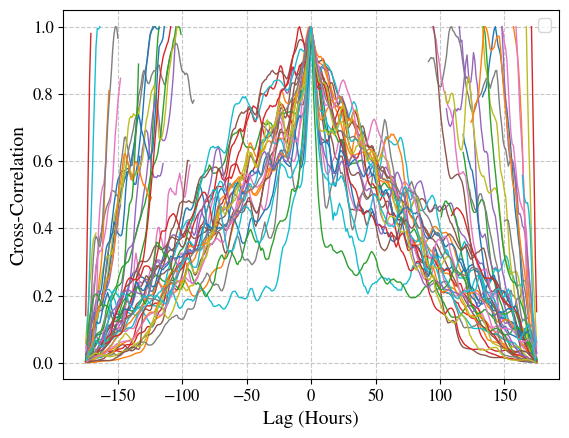

In [52]:
N_splits = 50
for df_ in np.array_split(df, N_splits):
    xdata = df_['NO'].values
    ydata = df_['NO2'].values


    res = correlate(xdata, ydata, mode='full', method='auto')
    lags = correlation_lags(len(xdata), len(ydata))

    res = res / max(res)
    #plt.figure()
    #plt.scatter(xdata, ydata, s=5)
    plt.plot(lags, res)
    plt.xlabel('Lag (Hours)')
    plt.ylabel('Cross-Correlation')
    
plt.legend()
    